<h2>Task3: Business Questions</h2>
<h3>Description</h3>
<p>Please answer below questions using both SQL and Python<br/>
1. How many products people usually order?<br/>
2. Which products are ordered the most?<br/>
3. Which product is most likely to be added first in cart?<br/>
4. What is the time at which people usually order products?</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1. How many products people usually order?</h3>

Result:
The 10 most popular quantities are: 5, 6, 4, 7, 3, 8, 2, 9, 10, 11

In [2]:
df_op = pd.read_csv("data/order_products.csv")
df_or = pd.read_csv("data/orders.csv")
df_joint1 = df_op.merge(df_or, on='order_id', how="left")
df_joint1

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,202279,3,5,9,8.0
1,2,28985,2,202279,3,5,9,8.0
2,2,9327,3,202279,3,5,9,8.0
3,2,45918,4,202279,3,5,9,8.0
4,2,30035,5,202279,3,5,9,8.0
...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,169679,30,0,10,4.0
33819102,3421063,35548,4,169679,30,0,10,4.0
33819103,3421070,35951,1,139822,15,6,10,8.0
33819104,3421070,16953,2,139822,15,6,10,8.0


In [3]:
grouped = df_joint1.groupby(by='order_id')
group_count = grouped.count().sort_values(by='product_id', ascending=False)
group_count

,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
1564244,145,145,145,145,145,145,145
790903,137,137,137,137,137,137,137
61355,127,127,127,127,127,127,127
2970392,121,121,121,121,121,121,121
2069920,116,116,116,116,116,116,116
...,...,...,...,...,...,...,...
1165807,1,1,1,1,1,1,1
463145,1,1,1,1,1,1,1
997201,1,1,1,1,1,1,1


In [4]:
grouped_group_count = group_count.groupby(by='product_id')
grouped_group_count.count()
grouped_group_count.count().sort_values(by='user_id', ascending=False).head(10)

,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
product_id,,,,,,
5,237225,237225,237225,237225,237225,237225
6,236383,236383,236383,236383,236383,236383
4,230299,230299,230299,230299,230299,230299
7,228547,228547,228547,228547,228547,228547
3,215060,215060,215060,215060,215060,215060
8,211357,211357,211357,211357,211357,211357
2,194361,194361,194361,194361,194361,194361
9,191564,191564,191564,191564,191564,191564
10,172103,172103,172103,172103,172103,172103


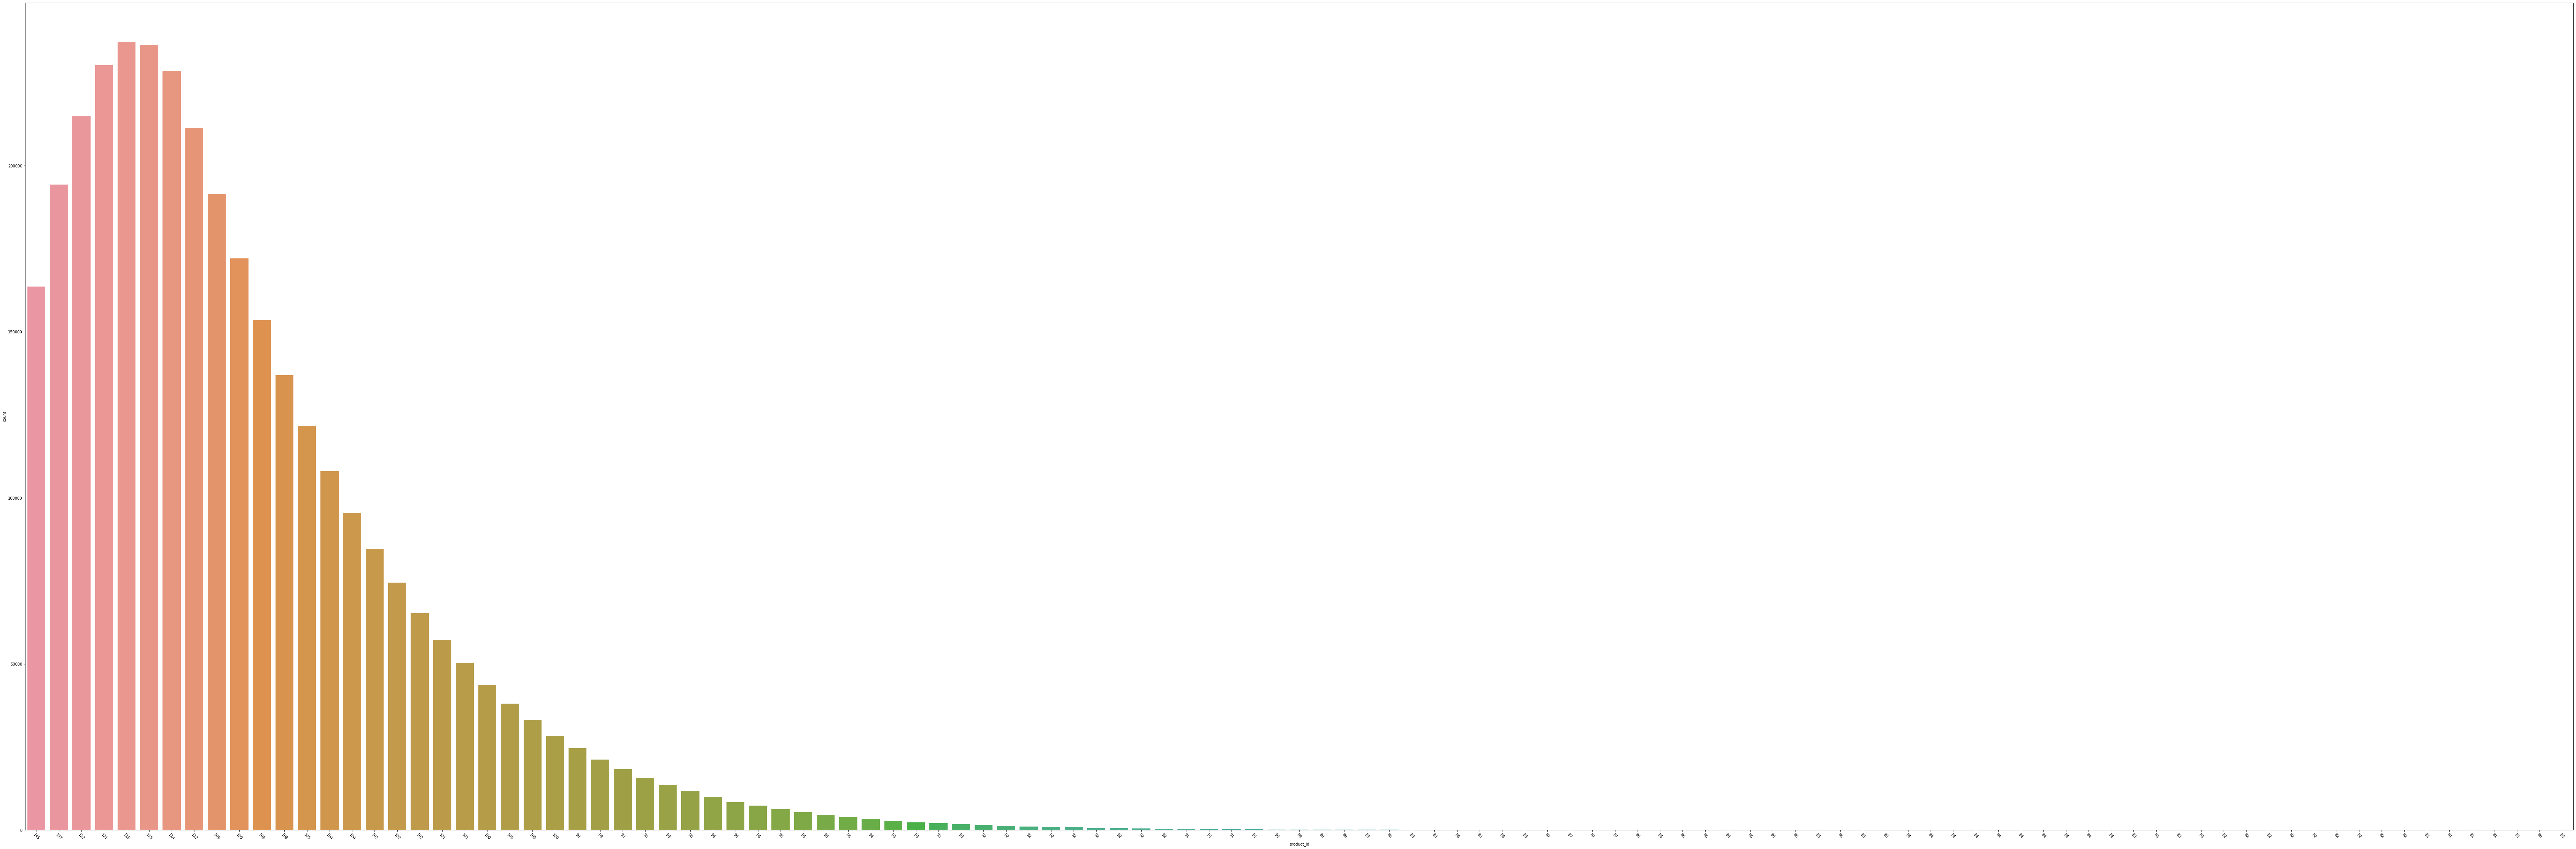

In [5]:
plt.figure(figsize=(120,40))

ax = sns.countplot(x="product_id", data = group_count)
ax.set_xticklabels(labels=group_count['product_id'], rotation=-45)

ax

<h3>2. Which products are ordered the most?</h3>

Result: 
Top3 most-ordered are: 1 Banana  2 Bag of Organic Bananas  3 Organic Strawberries

In [6]:
df_op = pd.read_csv("data/order_products.csv")
df_pr = pd.read_csv("data/products.csv")

In [7]:
grouped = df_op.groupby(by='product_id')
grouped_count = grouped.count().sort_values(by='order_id', ascending=False)
grouped_count.head(3)

,order_id,add_to_cart_order
product_id,,
24852,491291,491291
13176,394930,394930
21137,275577,275577


In [8]:
top1 = df_pr[df_pr['product_id']==24852]
print(top1)
top2 = df_pr[df_pr['product_id']==13176]
print(top2)
top3 = df_pr[df_pr['product_id']==21137]
print(top3)

       product_id product_name  aisle_id  department_id
24851       24852       Banana        24              4
       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
       product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4


<h3>3. Which product is most likely to be added first in cart?</h3>

Result: Banana

In [9]:
df_op = pd.read_csv("data/order_products.csv")
df_pr = pd.read_csv("data/products.csv")
df_op1 = df_op[df_op['add_to_cart_order']==1]
df_op1

,order_id,product_id,add_to_cart_order
0,2,33120,1
9,3,33754,1
17,4,46842,1
30,5,13176,1
56,6,40462,1
...,...,...,...
33819080,3421049,40800,1
33819086,3421056,5750,1
33819091,3421058,15629,1
33819099,3421063,49235,1


In [10]:
grouped = df_op1.groupby(by='product_id')
grouped_count = grouped.count().sort_values(by='order_id', ascending=False)
grouped_count.head(1)

,order_id,add_to_cart_order
product_id,,
24852,115521,115521


In [11]:
df_pr[df_pr['product_id']==24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


<h3>4. What is the time at which people usually order products</p></h3>

Result: 10

In [41]:
or_df = pd.read_csv("data/orders.csv")
grouped = or_df.groupby(by='order_hour_of_day')
grouped.count().sort_values(by='order_id', ascending=False).head(1)

,order_id,user_id,order_number,order_dow,days_since_prior_order
order_hour_of_day,,,,,
10,288418,288418,288418,288418,271768


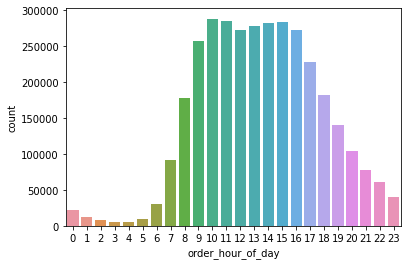

In [42]:
ax = sns.countplot(x="order_hour_of_day", data = or_df)
ax